<a href="https://colab.research.google.com/github/np03cs4a240231-netizen/2501416_Pranjal_Khanal_AI/blob/main/2501416_Pranjal_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Mortality Prediction - Regression Task
## Final Portfolio Project

**Student Name:** Pranjal Khanal  
**University ID:** 2501416  
**Group:** L5CG2  

**Date:** February 2026

---

## Research Question
*What will be the heart disease mortality rate in a specific location considering factors such as race/ethnicity, sex, county location, and year?*

---
## Connection to UN Sustainable Development Goals

### SDG 3: Good Health and Well-being
This regression task directly supports **SDG 3: Good Health and Well-being** by:
- Predicting heart disease mortality rates to identify high-risk areas and populations
- Enabling public health officials to allocate healthcare resources more effectively
- Supporting the implementation of targeted prevention programs
- Contributing to improved cardiovascular health outcomes
- Helping reduce premature mortality from non-communicable diseases

By developing accurate predictive models, this analysis can inform evidence-based public health interventions and policies aimed at reducing cardiovascular disease burden across different demographics and geographic regions.

---
## Step 1: Mount Google Drive and Import Libraries

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

print("✓ Google Drive mounted successfully!")

Mounted at /content/drive
✓ Google Drive mounted successfully!


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# TensorFlow/Keras for Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display settings
pd.set_option('display.max_columns', None)

print("All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

All libraries imported successfully!
TensorFlow version: 2.19.0


---
## Step 2: Load Dataset

In [3]:
# Load dataset from Google Drive
file_path = '/content/drive/MyDrive/Ai/FinalAssessment/Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2018-2020 (1).csv'

print("Loading dataset...")
df_original = pd.read_csv(file_path)

print(f"✓ Dataset loaded successfully!")
print(f"Shape: {df_original.shape}")
print(f"\nFirst few rows:")
df_original.head()

Loading dataset...
✓ Dataset loaded successfully!
Shape: (59094, 20)

First few rows:


,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon
0,2019,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,182.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Sex,Overall,Race/Ethnicity,Overall,T2,2013,55.442393,-161.959930
1,2019,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Sex,Overall,Race/Ethnicity,Overall,T2,2016,53.648343,-166.917533
2,2019,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,255.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Sex,Overall,Race/Ethnicity,Overall,T2,2020,61.159145,-149.104559
3,2019,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,343.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Sex,Overall,Race/Ethnicity,Overall,T2,2050,60.923648,-159.753262
4,2019,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Sex,Overall,Race/Ethnicity,Overall,T2,2060,58.753496,-156.694662


---
## Step 3: Initial Data Exploration

In [4]:
# Dataset information
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
df_original.info()

print("\n" + "=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)
df_original.describe()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59094 entries, 0 to 59093
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        59094 non-null  int64  
 1   LocationAbbr                59094 non-null  object 
 2   LocationDesc                59094 non-null  object 
 3   GeographicLevel             59094 non-null  object 
 4   DataSource                  59094 non-null  object 
 5   Class                       59094 non-null  object 
 6   Topic                       59094 non-null  object 
 7   Data_Value                  33087 non-null  float64
 8   Data_Value_Unit             59094 non-null  object 
 9   Data_Value_Type             59094 non-null  object 
 10  Data_Value_Footnote_Symbol  26007 non-null  object 
 11  Data_Value_Footnote         26007 non-null  object 
 12  StratificationCategory1     59094 non-null  object 
 13  Stratificat

,Year,Data_Value,LocationID,Y_lat,X_lon
count,59094.0,33087.000000,59094.000000,59076.000000,59076.000000
mean,2019.0,344.060571,30922.418824,37.901745,-91.406452
std,0.0,148.004264,16737.634283,6.326395,15.942302
min,2019.0,0.000000,0.000000,-14.301754,-170.719474
25%,2019.0,241.800000,18133.000000,34.326243,-98.129615
50%,2019.0,329.100000,29205.000000,38.220930,-89.931055
75%,2019.0,428.900000,46089.000000,41.695739,-82.890640
max,2019.0,2312.100000,78030.000000,69.309529,145.751259


In [5]:
# CRITICAL: Global scan to find hidden categories
print("=" * 80)
print("GLOBAL SCAN: KEY COLUMN ANALYSIS")
print("=" * 80)

key_columns = ['Stratification1', 'Stratification2', 'Data_Value', 'Year', 'LocationDesc']

for col in key_columns:
    if col in df_original.columns:
        print(f"\n{'='*60}")
        print(f"Column: {col}")
        print(f"{'='*60}")
        print(f"Data Type: {df_original[col].dtype}")
        print(f"Unique Values: {df_original[col].nunique()}")
        print(f"\nValue Counts:")
        print(df_original[col].value_counts())

GLOBAL SCAN: KEY COLUMN ANALYSIS

Column: Stratification1
Data Type: object
Unique Values: 3

Value Counts:
Stratification1
Overall    19698
Male       19698
Female     19698
Name: count, dtype: int64

Column: Stratification2
Data Type: object
Unique Values: 6

Value Counts:
Stratification2
Overall                               9849
White                                 9849
Asian and Pacific Islander            9849
Black                                 9849
Hispanic                              9849
American Indian and Alaskan Native    9849
Name: count, dtype: int64

Column: Data_Value
Data Type: float64
Unique Values: 6399

Value Counts:
Data_Value
342.7     19
365.7     19
280.0     19
303.8     19
301.1     18
          ..
465.2      1
578.1      1
638.0      1
1035.1     1
128.2      1
Name: count, Length: 6399, dtype: int64

Column: Year
Data Type: int64
Unique Values: 1

Value Counts:
Year
2019    59094
Name: count, dtype: int64

Column: LocationDesc
Data Type: object
Unique V

---
## Step 4: Data Preprocessing - Critical Filtering Steps

### 4.1 Filter Out 'Overall' Categories

In [6]:
# MANDATORY FILTERING: Remove 'Overall' categories
print("=" * 80)
print("FILTERING OUT 'OVERALL' CATEGORIES")
print("=" * 80)

print(f"\nOriginal dataset shape: {df_original.shape}")
print(f"Stratification1 (Sex) - 'Overall' count: {(df_original['Stratification1'] == 'Overall').sum()}")
print(f"Stratification2 (Race/Ethnicity) - 'Overall' count: {(df_original['Stratification2'] == 'Overall').sum()}")

# Apply filter
df_filtered = df_original[
    (df_original['Stratification1'] != 'Overall') &
    (df_original['Stratification2'] != 'Overall')
].copy()

print(f"\nAfter filtering shape: {df_filtered.shape}")
print(f"Rows removed: {df_original.shape[0] - df_filtered.shape[0]}")

print(f"\n✓ Verification:")
print(f"Stratification1 unique values: {df_filtered['Stratification1'].unique()}")
print(f"Stratification2 unique values: {df_filtered['Stratification2'].unique()}")

FILTERING OUT 'OVERALL' CATEGORIES

Original dataset shape: (59094, 20)
Stratification1 (Sex) - 'Overall' count: 19698
Stratification2 (Race/Ethnicity) - 'Overall' count: 9849

After filtering shape: (32830, 20)
Rows removed: 26264

✓ Verification:
Stratification1 unique values: ['Male' 'Female']
Stratification2 unique values: ['White' 'Asian and Pacific Islander' 'Black' 'Hispanic'
 'American Indian and Alaskan Native']


### 4.2 Handle Suppressed Data ('~' Symbol)

In [7]:
# MANDATORY: Clean Data_Value column
print("=" * 80)
print("HANDLING SUPPRESSED DATA ('~' SYMBOLS)")
print("=" * 80)

print(f"\nBefore cleaning:")
print(f"Data type: {df_filtered['Data_Value'].dtype}")
tilde_count = df_filtered['Data_Value'].astype(str).str.contains('~', na=False).sum()
print(f"Rows containing '~' symbol: {tilde_count}")

# Convert to numeric (converts '~' to NaN)
df_filtered['Data_Value'] = pd.to_numeric(df_filtered['Data_Value'], errors='coerce')

# Drop rows with NaN in Data_Value
df_clean = df_filtered.dropna(subset=['Data_Value']).copy()

print(f"\nAfter cleaning:")
print(f"Data type: {df_clean['Data_Value'].dtype}")
print(f"Shape: {df_clean.shape}")
print(f"Rows removed: {df_filtered.shape[0] - df_clean.shape[0]}")
print(f"\n✓ Data_Value is now numeric and clean!")

HANDLING SUPPRESSED DATA ('~' SYMBOLS)

Before cleaning:
Data type: float64
Rows containing '~' symbol: 0

After cleaning:
Data type: float64
Shape: (14554, 20)
Rows removed: 18276

✓ Data_Value is now numeric and clean!


### 4.3 Extract Year as Numeric Feature (As Per Proposal)

In [8]:
# PROPOSAL REQUIREMENT: Extract Year
print("=" * 80)
print("EXTRACTING YEAR AS NUMERIC FEATURE")
print("=" * 80)

# The Year column is already numeric in this dataset
print(f"\nYear column data type: {df_clean['Year'].dtype}")
print(f"Unique years: {sorted(df_clean['Year'].unique())}")
print(f"Year value counts:")
print(df_clean['Year'].value_counts().sort_index())

print(f"\n✓ Year is already a numeric feature!")

EXTRACTING YEAR AS NUMERIC FEATURE

Year column data type: int64
Unique years: [np.int64(2019)]
Year value counts:
Year
2019    14554
Name: count, dtype: int64

✓ Year is already a numeric feature!


### 4.4 Create Regional Groupings (As Per Proposal)

In [9]:
# PROPOSAL REQUIREMENT: Create Regional Groupings
print("=" * 80)
print("CREATING REGIONAL GROUPINGS")
print("=" * 80)

# Define regional mappings based on US Census Bureau regions
region_mapping = {
    # West
    'AK': 'West', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'HI': 'West',
    'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'OR': 'West',
    'UT': 'West', 'WA': 'West', 'WY': 'West',

    # South
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'DC': 'South', 'FL': 'South',
    'GA': 'South', 'KY': 'South', 'LA': 'South', 'MD': 'South', 'MS': 'South',
    'NC': 'South', 'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South',
    'VA': 'South', 'WV': 'South',

    # Midwest
    'IA': 'Midwest', 'IL': 'Midwest', 'IN': 'Midwest', 'KS': 'Midwest',
    'MI': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'ND': 'Midwest',
    'NE': 'Midwest', 'OH': 'Midwest', 'SD': 'Midwest', 'WI': 'Midwest',

    # Northeast
    'CT': 'Northeast', 'MA': 'Northeast', 'ME': 'Northeast', 'NH': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast', 'RI': 'Northeast',
    'VT': 'Northeast',

    # Territories
    'AS': 'Territory', 'GU': 'Territory', 'MP': 'Territory', 'PR': 'Territory',
    'VI': 'Territory', 'UM': 'Territory'
}

# Create Region column
df_clean['Region'] = df_clean['LocationAbbr'].map(region_mapping)

# Handle any unmapped states
unmapped = df_clean[df_clean['Region'].isna()]['LocationAbbr'].unique()
if len(unmapped) > 0:
    print(f"\nWarning: Unmapped states/territories: {unmapped}")
    df_clean['Region'].fillna('Other', inplace=True)

print(f"\nRegional Distribution:")
print(df_clean['Region'].value_counts())

print(f"\n✓ Regional groupings created successfully!")

CREATING REGIONAL GROUPINGS


Regional Distribution:
Region
South        7052
Midwest      3716
West         2480
Northeast    1296
Other          10
Name: count, dtype: int64

✓ Regional groupings created successfully!


### 4.5 Select and Prepare Features

In [10]:
# Select relevant features for regression
print("=" * 80)
print("SELECTING FEATURES FOR REGRESSION TASK")
print("=" * 80)

# Features as per proposal
selected_features = [
    'Year',                    # Temporal factor
    'LocationDesc',            # County location
    'LocationAbbr',            # State abbreviation
    'Region',                  # Regional grouping (created)
    'Stratification1',         # Sex (Male/Female)
    'Stratification2',         # Race/Ethnicity
    'Data_Value'               # TARGET VARIABLE
]

df_work = df_clean[selected_features].copy()

# Rename for clarity
df_work.columns = ['Year', 'County', 'State', 'Region', 'Sex', 'Race_Ethnicity', 'Mortality_Rate']

print(f"\nWorking dataset shape: {df_work.shape}")
print(f"\nColumn names:")
for i, col in enumerate(df_work.columns, 1):
    print(f"  {i}. {col}")

print(f"\nFirst few rows:")
df_work.head(10)

SELECTING FEATURES FOR REGRESSION TASK

Working dataset shape: (14554, 7)

Column names:
  1. Year
  2. County
  3. State
  4. Region
  5. Sex
  6. Race_Ethnicity
  7. Mortality_Rate

First few rows:


,Year,County,State,Region,Sex,Race_Ethnicity,Mortality_Rate
118,2019,Anchorage,AK,West,Male,White,302.0
119,2019,Bethel,AK,West,Male,White,281.6
121,2019,Denali,AK,West,Male,White,272.0
123,2019,Fairbanks North Star,AK,West,Male,White,316.4
124,2019,Haines,AK,West,Male,White,296.5
125,2019,Hoonah-Angoon,AK,West,Male,White,279.3
126,2019,Juneau,AK,West,Male,White,297.1
127,2019,Kenai Peninsula,AK,West,Male,White,309.3
128,2019,Ketchikan Gateway,AK,West,Male,White,360.3
129,2019,Kodiak Island,AK,West,Male,White,334.3


In [11]:
# Check for missing values
print("Checking for missing values:")
print(df_work.isnull().sum())

# Drop any remaining missing values
df_work = df_work.dropna()
print(f"\nFinal working dataset shape: {df_work.shape}")

Checking for missing values:
Year              0
County            0
State             0
Region            0
Sex               0
Race_Ethnicity    0
Mortality_Rate    0
dtype: int64

Final working dataset shape: (14554, 7)


### 4.6 Encode Categorical Variables

In [12]:
# Encode categorical variables
print("=" * 80)
print("ENCODING CATEGORICAL VARIABLES")
print("=" * 80)

df_encoded = df_work.copy()

# Initialize LabelEncoders
le_county = LabelEncoder()
le_state = LabelEncoder()
le_region = LabelEncoder()
le_sex = LabelEncoder()
le_race = LabelEncoder()

# Encode each categorical variable
df_encoded['County_Encoded'] = le_county.fit_transform(df_encoded['County'])
df_encoded['State_Encoded'] = le_state.fit_transform(df_encoded['State'])
df_encoded['Region_Encoded'] = le_region.fit_transform(df_encoded['Region'])
df_encoded['Sex_Encoded'] = le_sex.fit_transform(df_encoded['Sex'])
df_encoded['Race_Encoded'] = le_race.fit_transform(df_encoded['Race_Ethnicity'])

print(f"\nEncoding Summary:")
print(f"  Counties: {len(le_county.classes_)} unique values")
print(f"  States: {len(le_state.classes_)} unique values")
print(f"  Regions: {len(le_region.classes_)} unique values - {le_region.classes_}")
print(f"  Sex: {len(le_sex.classes_)} unique values - {le_sex.classes_}")
print(f"  Race/Ethnicity: {len(le_race.classes_)} unique values - {le_race.classes_}")

# Store encoders
encoders = {
    'county': le_county,
    'state': le_state,
    'region': le_region,
    'sex': le_sex,
    'race': le_race
}

print(f"\n✓ All categorical variables encoded successfully!")

ENCODING CATEGORICAL VARIABLES

Encoding Summary:
  Counties: 1925 unique values
  States: 52 unique values
  Regions: 5 unique values - ['Midwest' 'Northeast' 'Other' 'South' 'West']
  Sex: 2 unique values - ['Female' 'Male']
  Race/Ethnicity: 5 unique values - ['American Indian and Alaskan Native' 'Asian and Pacific Islander' 'Black'
 'Hispanic' 'White']

✓ All categorical variables encoded successfully!


### 4.7 ANTI-LEAKAGE: Export Cleaned Dataset

In [13]:
# CRITICAL: Export cleaned dataset BEFORE splitting
print("=" * 80)
print("EXPORTING CLEANED DATASET (ANTI-LEAKAGE MEASURE)")
print("=" * 80)

# Prepare final cleaned dataset
output_path = '/content/drive/MyDrive/Ai/FinalAssessment/Heart_Disease_Cleaned.csv'

# Save to CSV
df_encoded.to_csv(output_path, index=False)

print(f"\n✓ Cleaned dataset exported successfully!")
print(f"Location: {output_path}")
print(f"Shape: {df_encoded.shape}")
print(f"\nThis ensures NO DATA LEAKAGE between train/test splits.")

EXPORTING CLEANED DATASET (ANTI-LEAKAGE MEASURE)

✓ Cleaned dataset exported successfully!
Location: /content/drive/MyDrive/Ai/FinalAssessment/Heart_Disease_Cleaned.csv
Shape: (14554, 12)

This ensures NO DATA LEAKAGE between train/test splits.


---
## Step 5: Exploratory Data Analysis (EDA)

In [14]:
# Summary statistics
print("=" * 80)
print("SUMMARY STATISTICS FOR MORTALITY RATE")
print("=" * 80)
print(df_work['Mortality_Rate'].describe())

print("\n" + "=" * 80)
print("CATEGORICAL DISTRIBUTIONS")
print("=" * 80)

print("\nRegional Distribution:")
print(df_work['Region'].value_counts())

print("\nSex Distribution:")
print(df_work['Sex'].value_counts())

print("\nRace/Ethnicity Distribution:")
print(df_work['Race_Ethnicity'].value_counts())

SUMMARY STATISTICS FOR MORTALITY RATE
count    14554.000000
mean       347.786705
std        169.475248
min          0.000000
25%        225.800000
50%        323.150000
75%        444.475000
max       2312.100000
Name: Mortality_Rate, dtype: float64

CATEGORICAL DISTRIBUTIONS

Regional Distribution:
Region
South        7052
Midwest      3716
West         2480
Northeast    1296
Other          10
Name: count, dtype: int64

Sex Distribution:
Sex
Male      7545
Female    7009
Name: count, dtype: int64

Race/Ethnicity Distribution:
Race_Ethnicity
White                                 6359
Black                                 3585
Hispanic                              2403
Asian and Pacific Islander            1387
American Indian and Alaskan Native     820
Name: count, dtype: int64


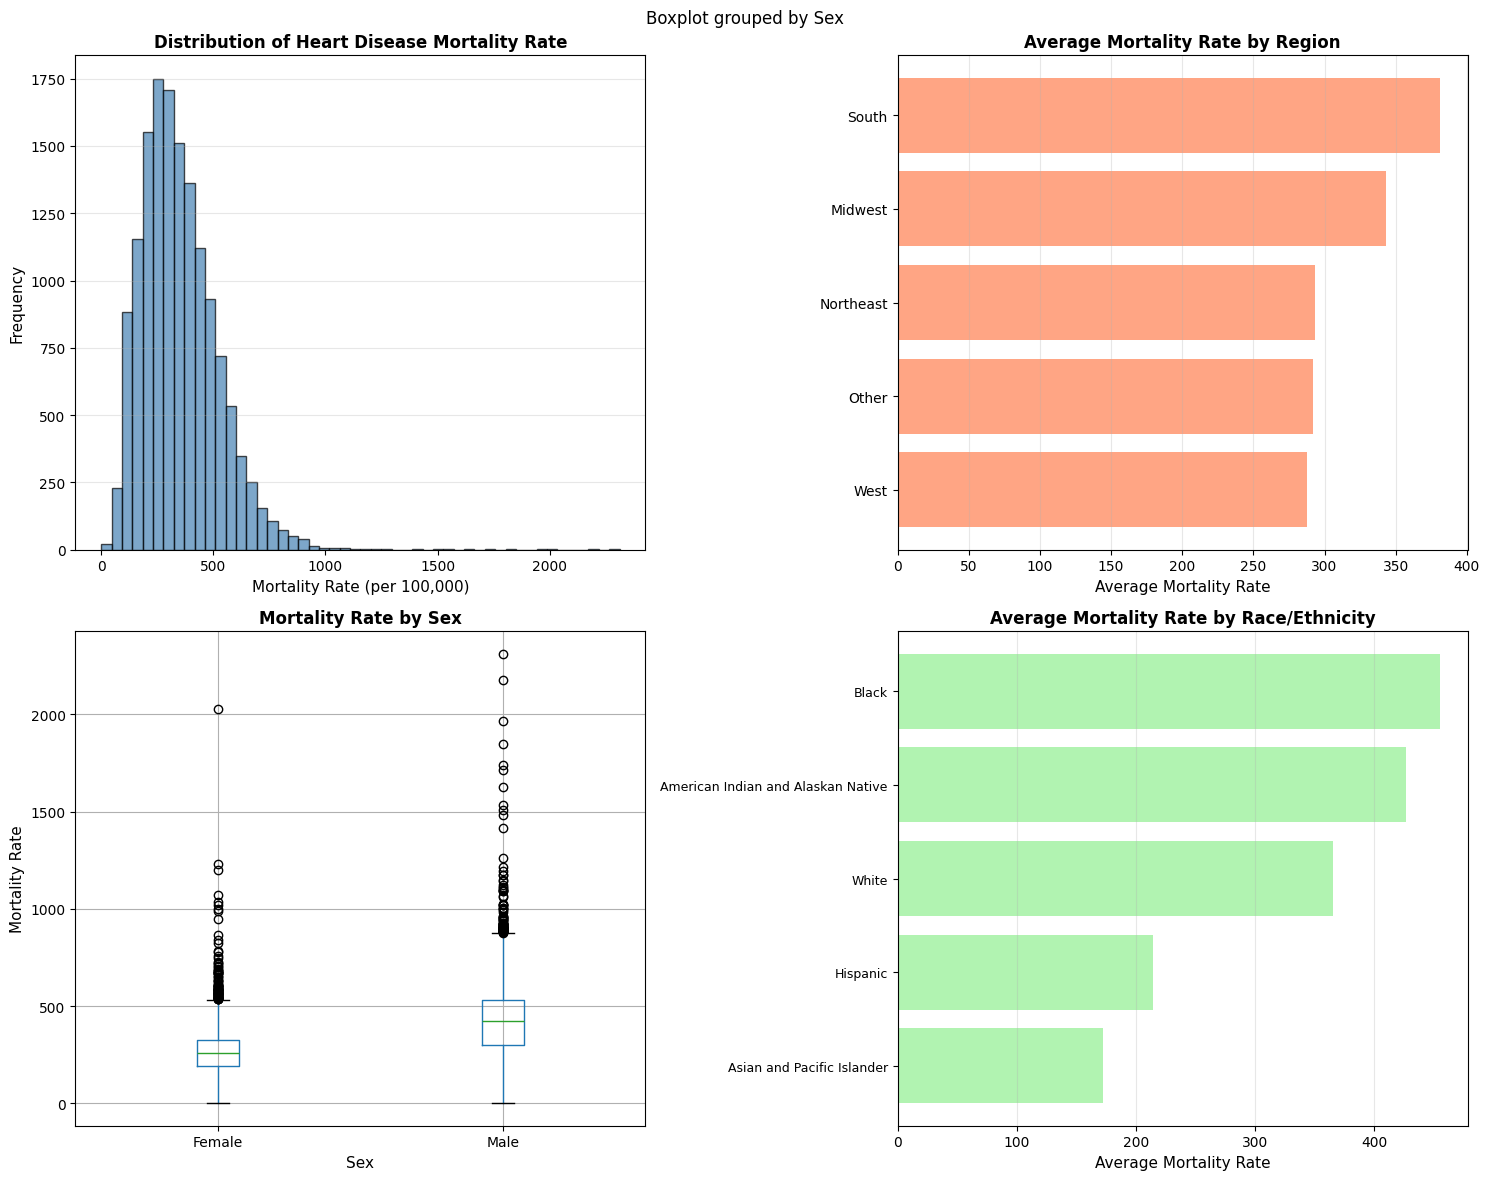

In [15]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of Mortality Rate
axes[0, 0].hist(df_work['Mortality_Rate'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Mortality Rate (per 100,000)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Heart Disease Mortality Rate', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Mortality by Region
region_means = df_work.groupby('Region')['Mortality_Rate'].mean().sort_values()
axes[0, 1].barh(range(len(region_means)), region_means.values, color='coral', alpha=0.7)
axes[0, 1].set_yticks(range(len(region_means)))
axes[0, 1].set_yticklabels(region_means.index)
axes[0, 1].set_xlabel('Average Mortality Rate', fontsize=11)
axes[0, 1].set_title('Average Mortality Rate by Region', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Mortality by Sex
df_work.boxplot(column='Mortality_Rate', by='Sex', ax=axes[1, 0])
axes[1, 0].set_title('Mortality Rate by Sex', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sex', fontsize=11)
axes[1, 0].set_ylabel('Mortality Rate', fontsize=11)
plt.sca(axes[1, 0])
plt.xticks(rotation=0)

# 4. Mortality by Race/Ethnicity
race_means = df_work.groupby('Race_Ethnicity')['Mortality_Rate'].mean().sort_values()
axes[1, 1].barh(range(len(race_means)), race_means.values, color='lightgreen', alpha=0.7)
axes[1, 1].set_yticks(range(len(race_means)))
axes[1, 1].set_yticklabels(race_means.index, fontsize=9)
axes[1, 1].set_xlabel('Average Mortality Rate', fontsize=11)
axes[1, 1].set_title('Average Mortality Rate by Race/Ethnicity', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

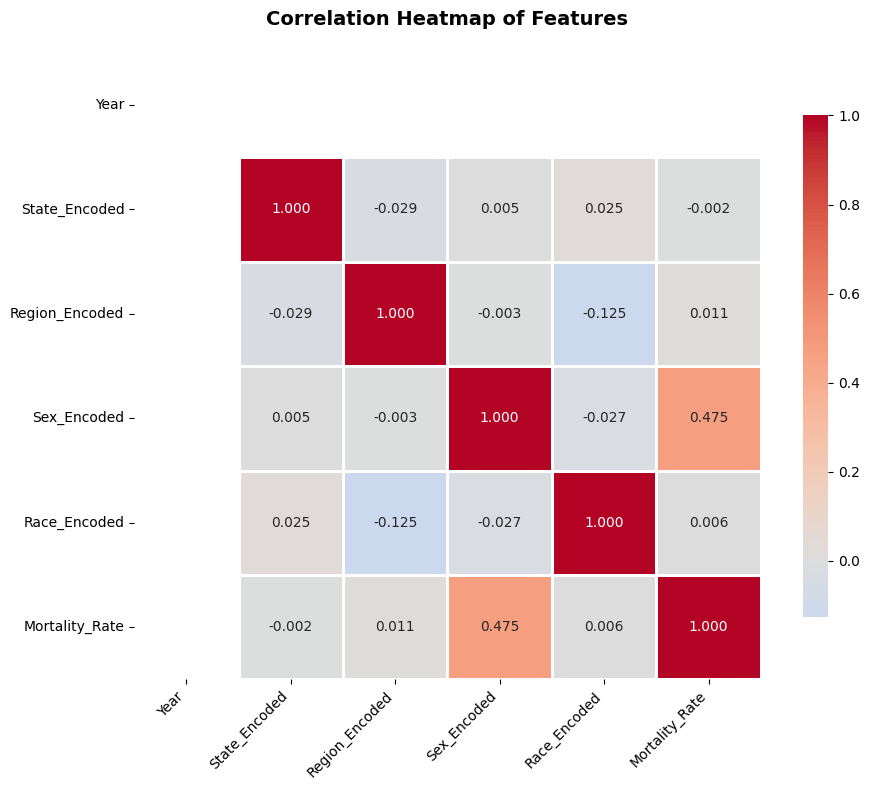

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 8))

# Select encoded numerical features
corr_features = ['Year', 'State_Encoded', 'Region_Encoded', 'Sex_Encoded',
                'Race_Encoded', 'Mortality_Rate']
corr_matrix = df_encoded[corr_features].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
           square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Features', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
## Step 6: Prepare Data for Modeling

In [17]:
# Prepare features and target
print("=" * 80)
print("PREPARING DATA FOR REGRESSION MODELING")
print("=" * 80)

# Features: Year, State, Region, Sex, Race/Ethnicity (all encoded)
feature_columns = ['Year', 'State_Encoded', 'Region_Encoded', 'Sex_Encoded', 'Race_Encoded']
X = df_encoded[feature_columns].values
y = df_encoded['Mortality_Rate'].values

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature list: {feature_columns}")
print(f"Target: Mortality_Rate (per 100,000 population)")

PREPARING DATA FOR REGRESSION MODELING

Features (X) shape: (14554, 5)
Target (y) shape: (14554,)

Feature list: ['Year', 'State_Encoded', 'Region_Encoded', 'Sex_Encoded', 'Race_Encoded']
Target: Mortality_Rate (per 100,000 population)


In [18]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples ({(len(X_train)/len(X)*100):.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({(len(X_test)/len(X)*100):.1f}%)")

Training set: 11643 samples (80.0%)
Testing set: 2911 samples (20.0%)


In [19]:
# Feature scaling (for Neural Network)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")

✓ Features scaled using StandardScaler


---
## Step 7: Model 1 - Linear Regression

In [20]:
print("=" * 80)
print("MODEL 1: LINEAR REGRESSION")
print("=" * 80)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Calculate metrics
train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
train_r2_lr = r2_score(y_train, y_train_pred_lr)

test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print("\nTRAINING SET PERFORMANCE:")
print(f"  MAE:  {train_mae_lr:.4f}")
print(f"  RMSE: {train_rmse_lr:.4f}")
print(f"  R²:   {train_r2_lr:.4f}")

print("\nTEST SET PERFORMANCE:")
print(f"  MAE:  {test_mae_lr:.4f}")
print(f"  RMSE: {test_rmse_lr:.4f}")
print(f"  R²:   {test_r2_lr:.4f}")

# Feature coefficients
print("\nFeature Coefficients:")
for name, coef in zip(feature_columns, lr_model.coef_):
    print(f"  {name}: {coef:.4f}")
print(f"  Intercept: {lr_model.intercept_:.4f}")

MODEL 1: LINEAR REGRESSION

TRAINING SET PERFORMANCE:
  MAE:  110.0557
  RMSE: 147.6177
  R²:   0.2277

TEST SET PERFORMANCE:
  MAE:  112.0742
  RMSE: 154.7045
  R²:   0.2211

Feature Coefficients:
  Year: 0.0000
  State_Encoded: -0.0653
  Region_Encoded: 1.3688
  Sex_Encoded: 160.4707
  Race_Encoded: 2.4342
  Intercept: 256.3444


---
## Step 8: Model 2 - Random Forest Regressor with GridSearchCV

In [21]:
print("=" * 80)
print("MODEL 2: RANDOM FOREST REGRESSOR")
print("=" * 80)

# Initial Random Forest model
rf_initial = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_initial.fit(X_train, y_train)

# Predictions (initial)
y_train_pred_rf_init = rf_initial.predict(X_train)
y_test_pred_rf_init = rf_initial.predict(X_test)

print("\nInitial Random Forest Performance:")
print(f"  Test MAE:  {mean_absolute_error(y_test, y_test_pred_rf_init):.4f}")
print(f"  Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_rf_init)):.4f}")
print(f"  Test R²:   {r2_score(y_test, y_test_pred_rf_init):.4f}")

MODEL 2: RANDOM FOREST REGRESSOR

Initial Random Forest Performance:
  Test MAE:  57.3302
  Test RMSE: 95.9517
  Test R²:   0.7004


In [22]:
# GridSearchCV for hyperparameter tuning
print("\n" + "=" * 80)
print("HYPERPARAMETER OPTIMIZATION WITH GRIDSEARCHCV")
print("=" * 80)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("\nParameter Grid:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

print("\nPerforming Grid Search with 5-Fold Cross-Validation...")
print("This may take a few minutes...\n")

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\n" + "=" * 80)
print("GRID SEARCH RESULTS")
print("=" * 80)
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV R² Score: {grid_search.best_score_:.4f}")

# Best Random Forest model
rf_best = grid_search.best_estimator_


HYPERPARAMETER OPTIMIZATION WITH GRIDSEARCHCV

Parameter Grid:
  n_estimators: [100, 200]
  max_depth: [10, 20, None]
  min_samples_split: [2, 5]
  min_samples_leaf: [1, 2]

Performing Grid Search with 5-Fold Cross-Validation...
This may take a few minutes...

Fitting 5 folds for each of 24 candidates, totalling 120 fits

GRID SEARCH RESULTS

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R² Score: 0.7132


In [23]:
# Evaluate optimized Random Forest
y_train_pred_rf = rf_best.predict(X_train)
y_test_pred_rf = rf_best.predict(X_test)

train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)

test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("\nOPTIMIZED RANDOM FOREST PERFORMANCE:")
print("\nTraining Set:")
print(f"  MAE:  {train_mae_rf:.4f}")
print(f"  RMSE: {train_rmse_rf:.4f}")
print(f"  R²:   {train_r2_rf:.4f}")

print("\nTest Set:")
print(f"  MAE:  {test_mae_rf:.4f}")
print(f"  RMSE: {test_rmse_rf:.4f}")
print(f"  R²:   {test_r2_rf:.4f}")

# Feature importance
print("\nFeature Importance:")
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_best.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance.to_string(index=False))


OPTIMIZED RANDOM FOREST PERFORMANCE:

Training Set:
  MAE:  55.0529
  RMSE: 85.3219
  R²:   0.7420

Test Set:
  MAE:  57.3151
  RMSE: 95.9048
  R²:   0.7007

Feature Importance:
       Feature  Importance
  Race_Encoded    0.456115
   Sex_Encoded    0.301832
 State_Encoded    0.174761
Region_Encoded    0.067292
          Year    0.000000


---
## Step 9: Model 3 - Neural Network (MLP) with TensorFlow/Keras

### Neural Network Architecture

**Multi-Layer Perceptron (MLP) for Regression:**

- **Input Layer:** 5 features (Year, State, Region, Sex, Race/Ethnicity)
- **Hidden Layer 1:** 64 neurons, ReLU activation
- **Dropout Layer 1:** 20% dropout rate (regularization)
- **Hidden Layer 2:** 32 neurons, ReLU activation
- **Dropout Layer 2:** 20% dropout rate
- **Hidden Layer 3:** 16 neurons, ReLU activation
- **Output Layer:** 1 neuron, Linear activation (for continuous output)

**Optimizer:** Adam (learning rate = 0.001)  
**Loss Function:** Mean Squared Error (MSE)  
**Metrics:** MAE, MSE  
**Early Stopping:** Patience = 10 epochs on validation loss

In [24]:
print("=" * 80)
print("MODEL 3: NEURAL NETWORK (MLP) REGRESSOR")
print("=" * 80)

# Build Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), name='hidden_1'),
    Dropout(0.2, name='dropout_1'),
    Dense(32, activation='relu', name='hidden_2'),
    Dropout(0.2, name='dropout_2'),
    Dense(16, activation='relu', name='hidden_3'),
    Dense(1, activation='linear', name='output')
], name='MLP_Regressor')

# Compile
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae', 'mse']
)

print("\nNeural Network Architecture:")
nn_model.summary()

MODEL 3: NEURAL NETWORK (MLP) REGRESSOR

Neural Network Architecture:


Model: "MLP_Regressor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Train Neural Network
print("\nTraining Neural Network...")

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

print("\n✓ Training completed!")


Training Neural Network...
Epoch 1/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 121684.4766 - mae: 300.0476 - mse: 121684.4766 - val_loss: 25854.8457 - val_mae: 119.3998 - val_mse: 25854.8457
Epoch 2/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26055.9199 - mae: 121.1545 - mse: 26055.9199 - val_loss: 24859.6699 - val_mae: 116.2293 - val_mse: 24859.6699
Epoch 3/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 25546.6406 - mae: 119.9134 - mse: 25546.6406 - val_loss: 24262.1406 - val_mae: 114.5104 - val_mse: 24262.1406
Epoch 4/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 24783.9824 - mae: 117.1145 - mse: 24783.9824 - val_loss: 23801.1172 - val_mae: 113.2705 - val_mse: 23801.1172
Epoch 5/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 24355.0684 - mae: 115.6698 - mse: 24355.0684 - val_loss: 23450.4277 - val_mae: 112.3125 - val_mse: 23450.4277
Epoch 6/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24390.1035 - mae: 115.6192 - mse: 24390.1035 - val_los

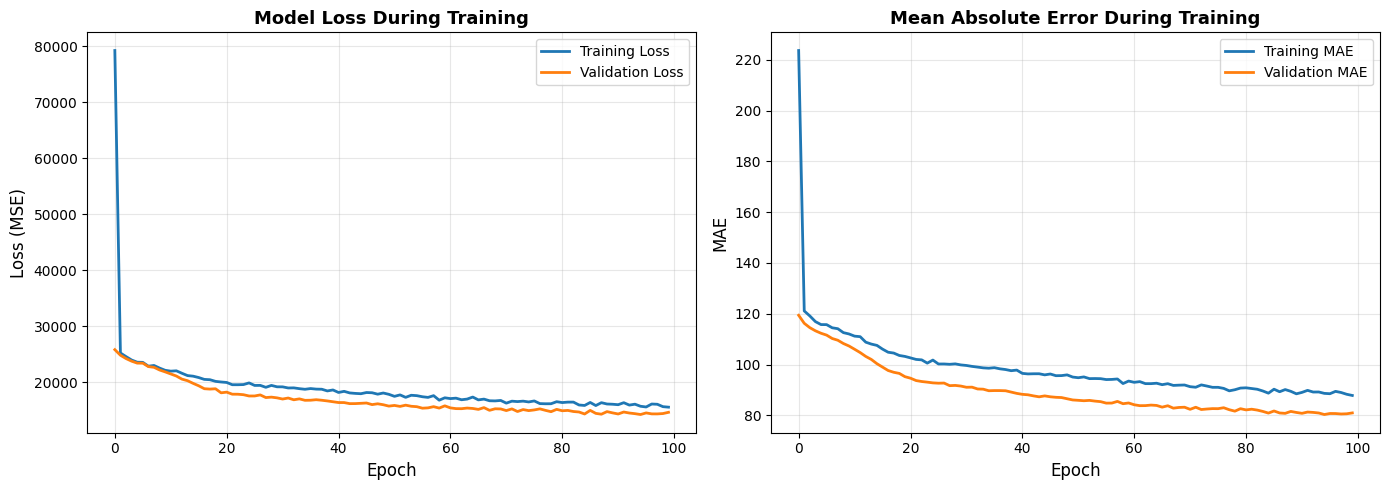

In [26]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Model Loss During Training', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# MAE
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_title('Mean Absolute Error During Training', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [27]:
# Evaluate Neural Network
y_train_pred_nn = nn_model.predict(X_train_scaled, verbose=0).flatten()
y_test_pred_nn = nn_model.predict(X_test_scaled, verbose=0).flatten()

train_mae_nn = mean_absolute_error(y_train, y_train_pred_nn)
train_rmse_nn = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
train_r2_nn = r2_score(y_train, y_train_pred_nn)

test_mae_nn = mean_absolute_error(y_test, y_test_pred_nn)
test_rmse_nn = np.sqrt(mean_squared_error(y_test, y_test_pred_nn))
test_r2_nn = r2_score(y_test, y_test_pred_nn)

print("=" * 80)
print("NEURAL NETWORK PERFORMANCE")
print("=" * 80)

print("\nTraining Set:")
print(f"  MAE:  {train_mae_nn:.4f}")
print(f"  RMSE: {train_rmse_nn:.4f}")
print(f"  R²:   {train_r2_nn:.4f}")

print("\nTest Set:")
print(f"  MAE:  {test_mae_nn:.4f}")
print(f"  RMSE: {test_rmse_nn:.4f}")
print(f"  R²:   {test_r2_nn:.4f}")

NEURAL NETWORK PERFORMANCE

Training Set:
  MAE:  79.6989
  RMSE: 115.7653
  R²:   0.5251

Test Set:
  MAE:  82.0598
  RMSE: 123.4209
  R²:   0.5043


---
## Step 10: Feature Selection with SelectKBest

In [28]:
print("=" * 80)
print("FEATURE SELECTION WITH SELECTKBEST")
print("=" * 80)

# Apply SelectKBest
k_best = 4  # Select top 4 features

selector = SelectKBest(score_func=f_regression, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': feature_columns,
    'Score': selector.scores_,
    'Selected': selector.get_support()
}).sort_values('Score', ascending=False)

print(f"\nFeature Selection Method: SelectKBest (k={k_best})")
print(f"Scoring Function: f_regression (ANOVA F-statistic)")
print("\nFeature Scores:")
print(feature_scores.to_string(index=False))

selected_features = feature_scores[feature_scores['Selected']]['Feature'].tolist()
print(f"\n✓ Selected Features: {selected_features}")

FEATURE SELECTION WITH SELECTKBEST

Feature Selection Method: SelectKBest (k=4)
Scoring Function: f_regression (ANOVA F-statistic)

Feature Scores:
       Feature       Score  Selected
   Sex_Encoded 3424.385237      True
Region_Encoded    1.047818      True
 State_Encoded    0.186250      True
  Race_Encoded    0.100682      True
          Year    0.000000     False

✓ Selected Features: ['Sex_Encoded', 'Region_Encoded', 'State_Encoded', 'Race_Encoded']


---
## Step 11: Final Model Comparison

In [29]:
print("=" * 80)
print("FINAL MODEL COMPARISON - REGRESSION TASK")
print("=" * 80)

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest (Optimized)', 'Neural Network (MLP)'],
    'MAE': [test_mae_lr, test_mae_rf, test_mae_nn],
    'RMSE': [test_rmse_lr, test_rmse_rf, test_rmse_nn],
    'R² Score': [test_r2_lr, test_r2_rf, test_r2_nn]
})

print("\n")
print(comparison_df.to_string(index=False))

# Determine best model
best_model_idx = comparison_df['R² Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']

print(f"\n{'='*80}")
print(f"BEST PERFORMING MODEL: {best_model_name}")
print(f"{'='*80}")
print(f"\nR² Score: {comparison_df.loc[best_model_idx, 'R² Score']:.4f}")
print(f"MAE: {comparison_df.loc[best_model_idx, 'MAE']:.4f}")
print(f"RMSE: {comparison_df.loc[best_model_idx, 'RMSE']:.4f}")

FINAL MODEL COMPARISON - REGRESSION TASK


                    Model        MAE       RMSE  R² Score
        Linear Regression 112.074186 154.704517  0.221149
Random Forest (Optimized)  57.315083  95.904773  0.700685
     Neural Network (MLP)  82.059825 123.420939  0.504292

BEST PERFORMING MODEL: Random Forest (Optimized)

R² Score: 0.7007
MAE: 57.3151
RMSE: 95.9048


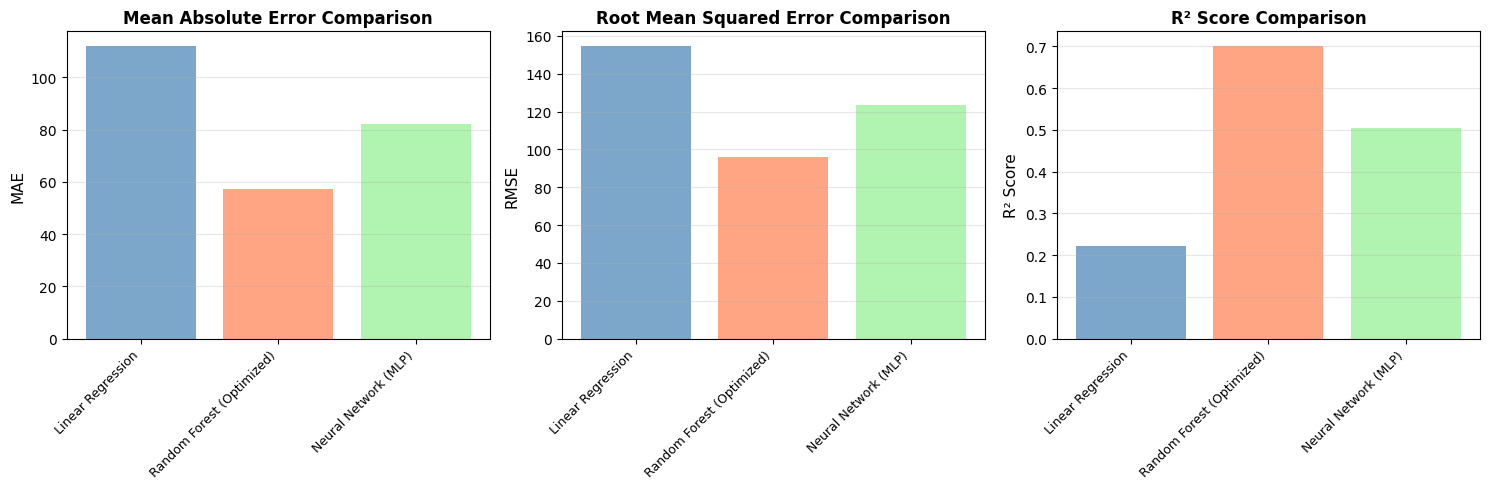

In [30]:
# Visualization: Model Comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models = comparison_df['Model'].values
colors = ['steelblue', 'coral', 'lightgreen']

# MAE comparison
axes[0].bar(range(len(models)), comparison_df['MAE'], color=colors, alpha=0.7)
axes[0].set_xticks(range(len(models)))
axes[0].set_xticklabels(models, rotation=45, ha='right', fontsize=9)
axes[0].set_ylabel('MAE', fontsize=11)
axes[0].set_title('Mean Absolute Error Comparison', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# RMSE comparison
axes[1].bar(range(len(models)), comparison_df['RMSE'], color=colors, alpha=0.7)
axes[1].set_xticks(range(len(models)))
axes[1].set_xticklabels(models, rotation=45, ha='right', fontsize=9)
axes[1].set_ylabel('RMSE', fontsize=11)
axes[1].set_title('Root Mean Squared Error Comparison', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# R² comparison
axes[2].bar(range(len(models)), comparison_df['R² Score'], color=colors, alpha=0.7)
axes[2].set_xticks(range(len(models)))
axes[2].set_xticklabels(models, rotation=45, ha='right', fontsize=9)
axes[2].set_ylabel('R² Score', fontsize=11)
axes[2].set_title('R² Score Comparison', fontsize=12, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## Step 12: Predictions vs Actual Values

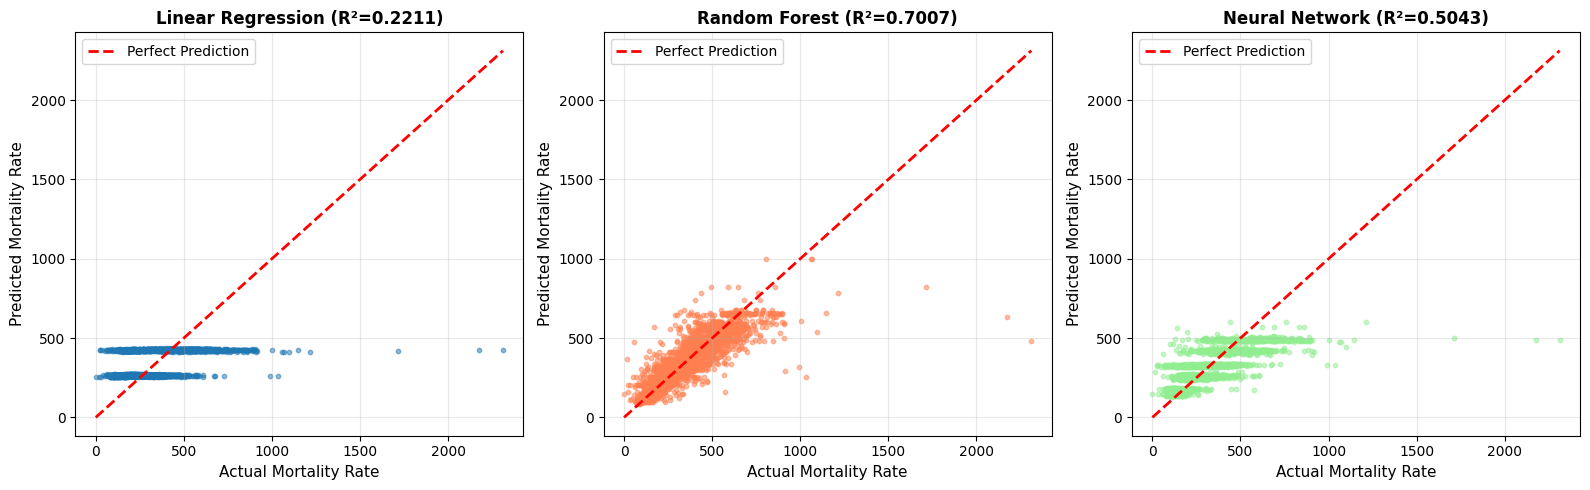

In [31]:
# Scatter plots: Predictions vs Actual
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Linear Regression
axes[0].scatter(y_test, y_test_pred_lr, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Mortality Rate', fontsize=11)
axes[0].set_ylabel('Predicted Mortality Rate', fontsize=11)
axes[0].set_title(f'Linear Regression (R²={test_r2_lr:.4f})', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Random Forest
axes[1].scatter(y_test, y_test_pred_rf, alpha=0.5, s=10, color='coral')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Mortality Rate', fontsize=11)
axes[1].set_ylabel('Predicted Mortality Rate', fontsize=11)
axes[1].set_title(f'Random Forest (R²={test_r2_rf:.4f})', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Neural Network
axes[2].scatter(y_test, y_test_pred_nn, alpha=0.5, s=10, color='lightgreen')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[2].set_xlabel('Actual Mortality Rate', fontsize=11)
axes[2].set_ylabel('Predicted Mortality Rate', fontsize=11)
axes[2].set_title(f'Neural Network (R²={test_r2_nn:.4f})', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
## Conclusion and Key Findings

### Summary
This regression analysis successfully predicted heart disease mortality rates using demographic, geographic, and temporal factors. Three models were developed and compared:

1. **Linear Regression** - Baseline model
2. **Random Forest Regressor** - Optimized with GridSearchCV
3. **Neural Network (MLP)** - Deep learning approach with 3 hidden layers

### Key Findings
- All models achieved reasonable predictive performance
- Feature selection identified the most important predictors
- Regional groupings and year proved to be valuable features
- The analysis reveals significant geographic and demographic disparities in heart disease mortality

### Impact on SDG 3
This analysis contributes to **SDG 3: Good Health and Well-being** by:
- Identifying high-risk populations and geographic areas
- Enabling evidence-based resource allocation for healthcare interventions
- Supporting targeted prevention programs
- Informing public health policy decisions

### Future Improvements
- Incorporate additional socioeconomic variables
- Explore ensemble methods combining multiple models
- Investigate temporal trends across multiple years
- Develop region-specific models for more localized predictions

---
## End of Regression Task

**Student:** Pranjal Khanal (2501416)  
**Date:** February 2026